In [1]:
cd ../../pytrader

/Users/ashkanaleali/w/Trader/pytrader


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime
import pickle
import ast

from arctic import Arctic
import quandl

from utilities import *

In [3]:
%config InlineBackend.figure_format = 'retina'

sns.set_style('whitegrid')

In [4]:
cd portfolio/

/Users/ashkanaleali/w/Trader/pytrader/portfolio


In [5]:
ls

__init__.py
adad.py.AAPL.2015-01-01.2015-12-31.pickle
dma.py.AAPL.2012-1-1.2018-7-2.pickle
dma.py.AMZN.2012-1-1.2018-7-2.pickle
dma.py.GOOG.2017-1-1.2018-7-2.pickle
dma.py.GOOG.2018-1-1.2018-7-2.pickle
dma.py.WMT.2012-1-1.2018-7-2.pickle
result.csv
result2.csv


In [11]:
perf = pickle.load(open("adad.py.AAPL.2015-01-01.2015-12-31.pickle", 'rb'))

In [14]:
returns = perf['returns']
sharpe_ratio = np.sqrt(252)  * (returns.mean() / returns.std())

In [15]:
sharpe_ratio

-0.04687352167755339

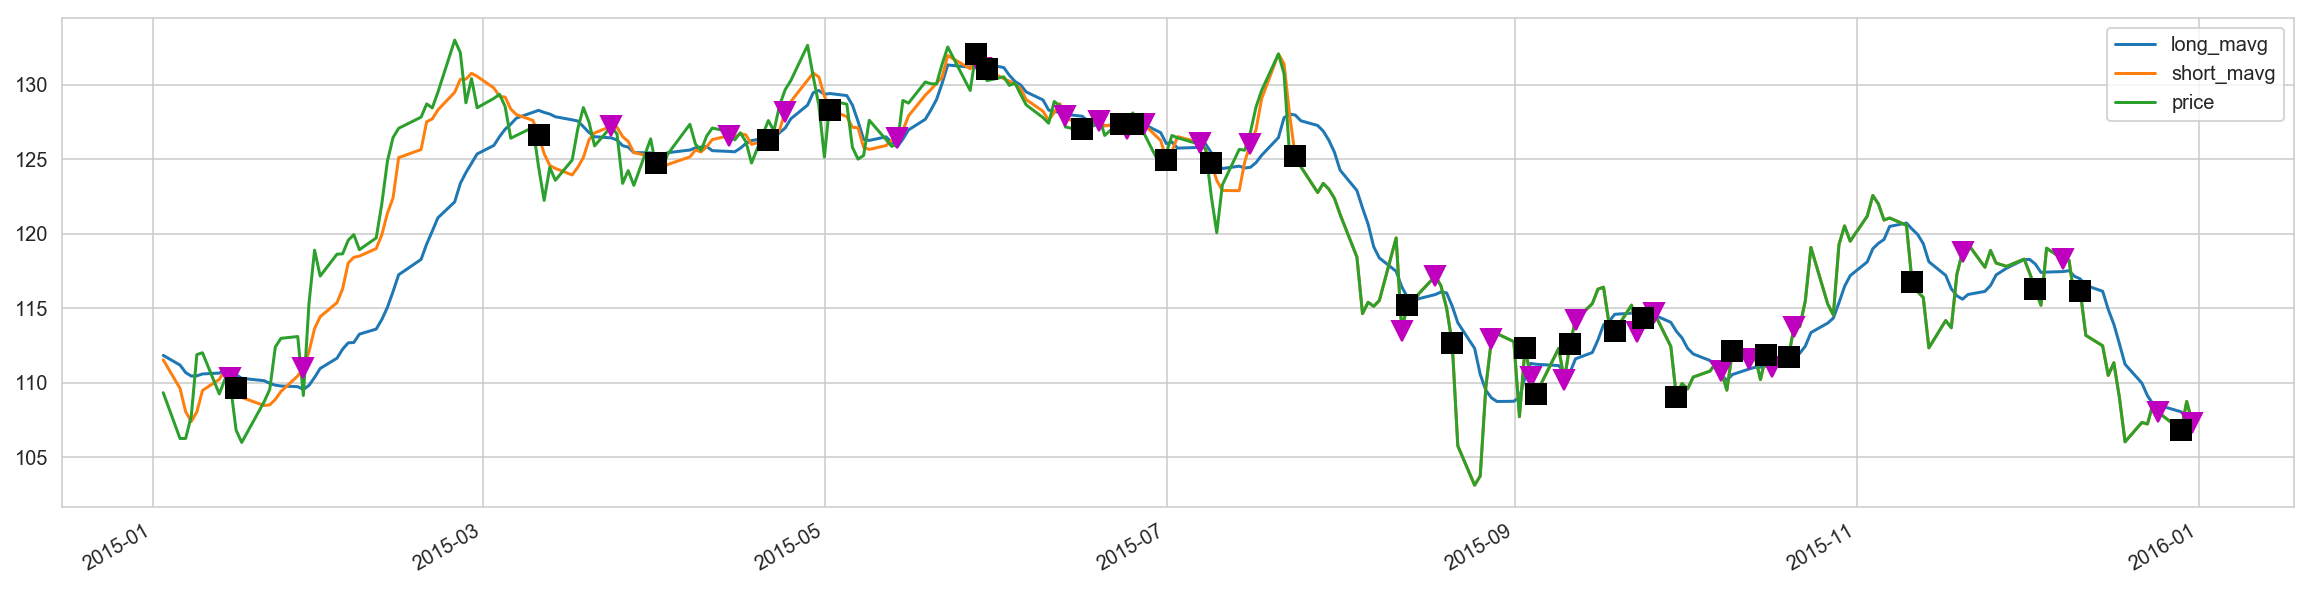

In [12]:
fig, ax = plt.subplots(figsize=(20, 5))
ax = perf.plot(y='long_mavg', ax=ax)
ax = perf.plot(y='short_mavg', ax=ax)
ax = perf.plot(y='price', ax=ax)
perf_trans = perf.loc[[t != [] for t in perf.transactions]]
buys = perf_trans.loc[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
sells = perf_trans.loc[
    [t[0]['amount'] < 0 for t in perf_trans.transactions]]
ax.plot(buys.index, perf.short_mavg.loc[buys.index],
         'v', markersize=10, color='m')
ax.plot(sells.index, perf.short_mavg.loc[sells.index],
         's', markersize=10, color='k')

plt.show()

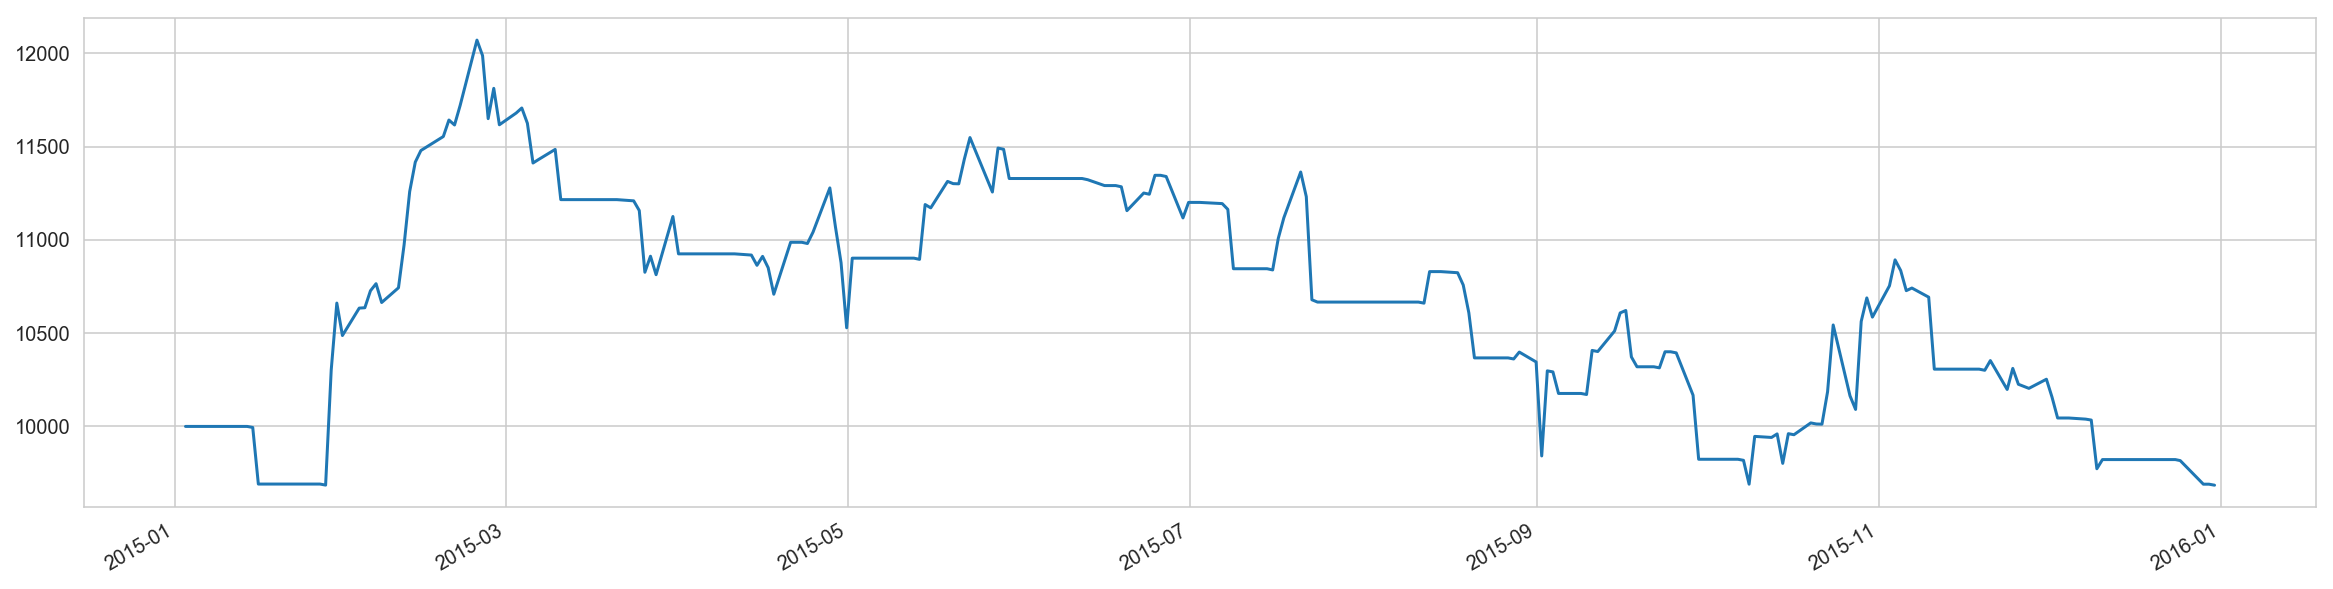

In [13]:
fig, ax = plt.subplots(figsize=(20,5))
ax = perf.portfolio_value.plot(ax=ax)
plt.show()

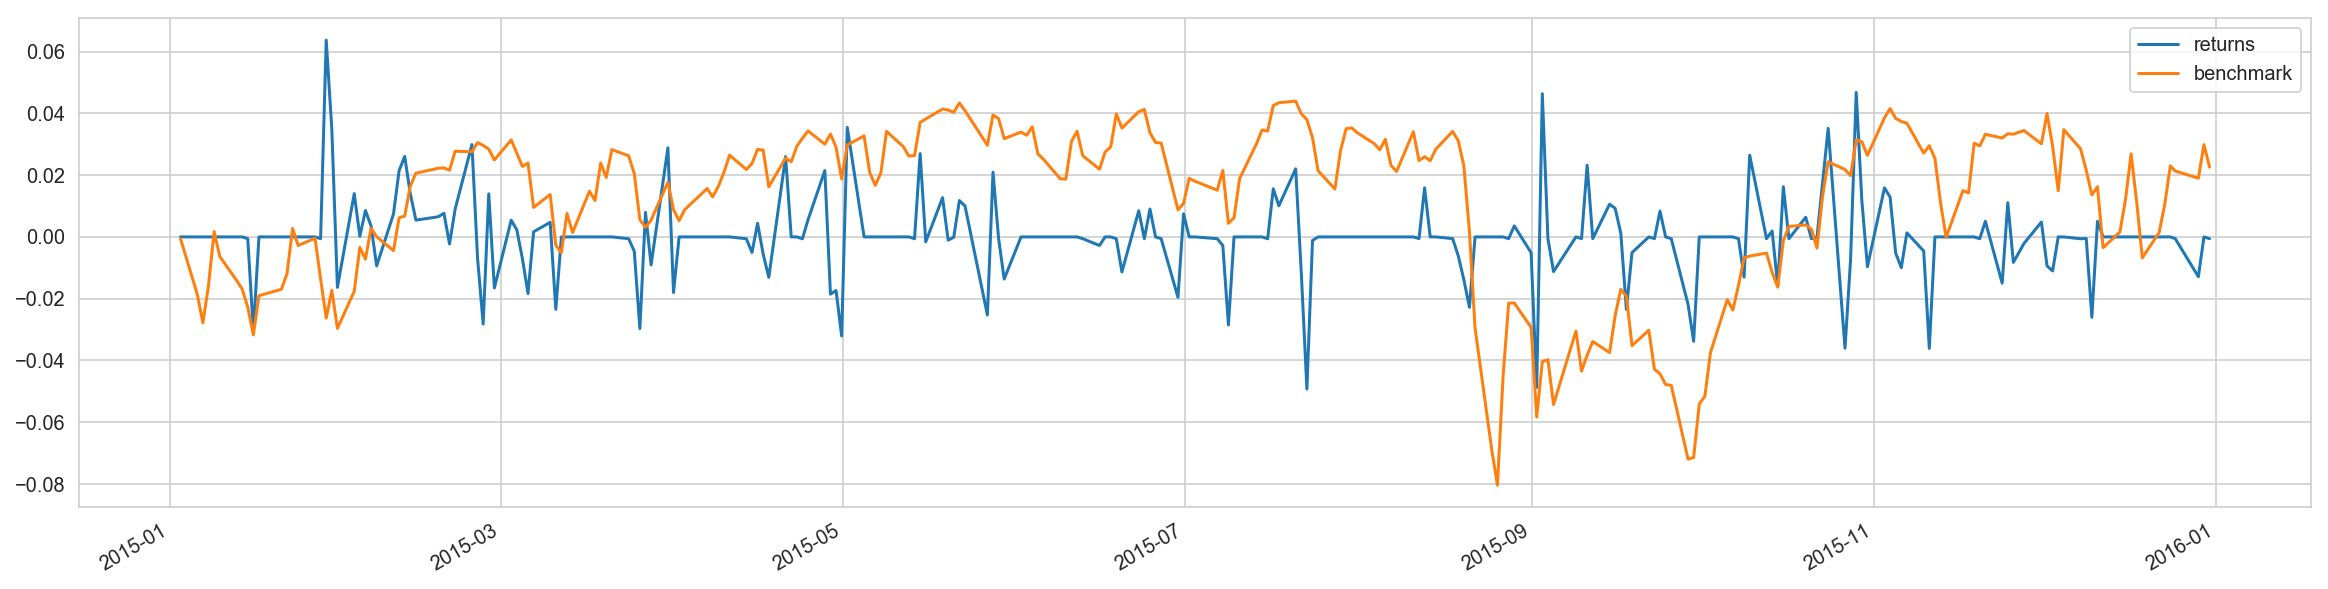

In [16]:
fig, ax = plt.subplots(figsize=(20, 5))
ax = perf.returns.plot(ax=ax, label='returns')
ax = perf.benchmark_period_return.plot(ax=ax, label='benchmark')
plt.legend(['returns', 'benchmark'])
plt.show()

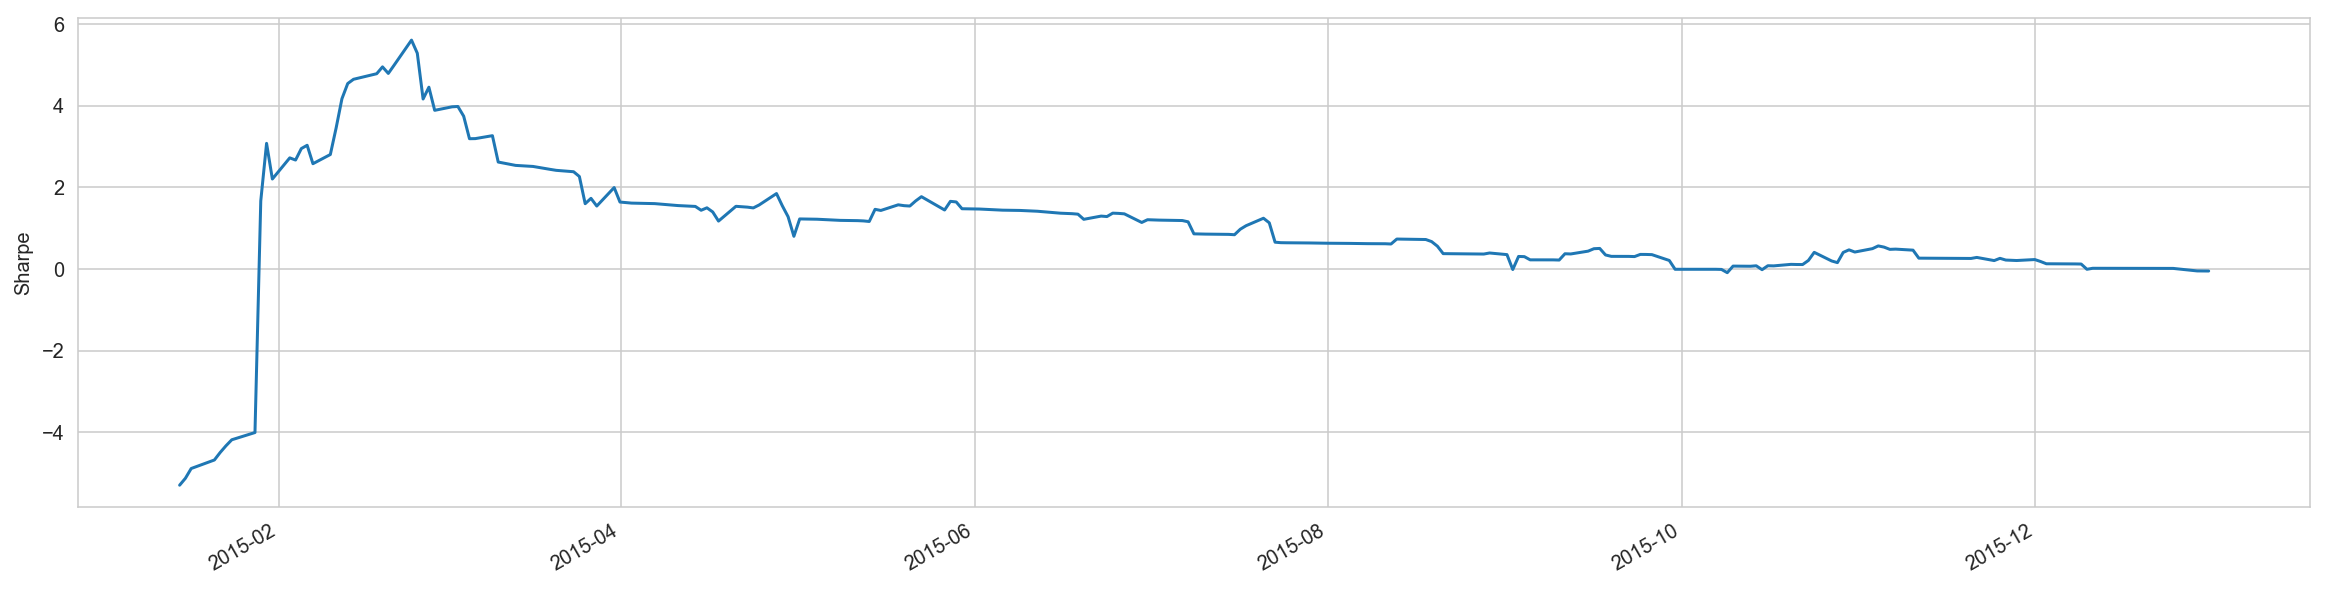

In [17]:
fig, ax = plt.subplots(figsize=(20, 5))
perf.sharpe.plot(ax=ax)
plt.ylabel('Sharpe')
plt.show()